<a href="https://colab.research.google.com/github/Apenas1Silva/SOData_2025/blob/main/SOData24_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of Data Brazil 2024-2025

*1 - Sobre a Pesquisa*

Entre novembro e dezembro de 2024, mais de 5,2 mil profissionais responderam o State of Data Brazil -a pesquisa anual, do maior panorama do mercado de trabalho em dados no Brasil -, feito pela comunidade Data Hackers em parceria com a Bain & Company, esta é a 5ª edição desta pesquisa que teve início em 2019.


Veja mais detalhes no site da pesquisa: stateofdata.datahackers.com.br - No site da pesquisa você também pode fazer o download gratuito de um relatório completo desenvolvido pela Bain & Company com conclusões interessantes sobre o mercado de trabalho brasileiro na área de dados.


A presente pesquisa é o resultado de um esforço conjunto da Data Hackers, a maior comunidade de dados do Brasil, e da Bain & Company, consultoria global que ajuda empresas e organizações a promover mudanças que definam o futuro dos negócios, para mapear o mercado de trabalho de dados no Brasil.

A pesquisa foi conduzida entre 14 de outubro de 2024 e 18 de dezembro de 2024 e contou com 5.217
respondentes brasileiros. A amostra reflete a visão de variados papéis de atuação em empresas, como os de
analista de dados, cientista de dados e engenheiro de dados, bem como diferentes perfis de experiência
profissional, incluindo analistas júnior, pleno, sênior e gestores.

Gostaríamos de agradecer a toda a comunidade Data Hackers e a todos os parceiros que nos apoiaram durante a pesquisa, incluindo André Sionek, Karine Lago, Canal Let's Data, Canal Programação Dinâmica, Canal do Mario Filho, Alura, Canal Estatidados, Comunidade Mulheres em Dados, Teo Calvo, Flai, QuantitativaMente, Preditiva e professora Fernanda Maciel, sem o apoio de vocês nunca teríamos chegado a uma pesquisa tão completa e abrangente.

2 Sobre o processamento e anonimização dos dados
O dataset foi anonimizado com o objetivo de garantir a privacidade dos respondentes, para isso foi necessário em alguns casos remover outliers que poderiam identificar o entrevistado e, portanto, nem todos os dados coletados na pesquisa estarão disponíveis aqui. Estados com menor incidência de resposta, como alguns da região Norte por exemplo, terão apenas sua região indicada no dataset, também como consequência do processo de anonimização, o mesmo aconteceu em algumas outras perguntas.

As perguntas cujas respostas são multi-valoradas ocupam mais de uma coluna no dataset. Portanto, para diferenciar quais colunas pertencem a quais perguntas, cada coluna é identificada com uma tupla. Sendo o primeiro identificador o da pergunta, e, no caso de várias respostas, o segundo identificador referencia a alternativa escolhida. As perguntas mapeadas são mostradas abaixo (lembrando que algumas foram removidas e outras tiveram alguns outliers transformados/apagados no processo de anonimização)

3 Sobre os dados da Pesquisa
O questionário foi dividido em 8 partes, e dentro de cada uma das partes temos as perguntas e opções de escolha.

Parte 1 - Dados demográficos

Parte 2 - Dados sobre carreira

Parte 3 - Desafios dos gestores de times de dados

Parte 4 - Conhecimentos na área de dados

Parte 5 - Objetivos na área de dados

Parte 6 - Conhecimentos em Engenharia de Dados/DE

Parte 7 - Conhecimentos em Análise de Dados/DA

Parte 8 - Conhecimentos em Ciências de Dados/DS

Cada pergunta é dividida em Parte, Letra da Pergunta, Número da Opção escolhida
Exemplo: P3a_1 = Parte 3, pergunta (a), opção (1)

In [1]:
#Importando as Bibliotecas
import kagglehub
import os
import pandas as pd
import re
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb

import geopandas as gpd

import numpy as np

import seaborn as sns
color_pal = sns.color_palette()

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import warnings
warnings.filterwarnings('ignore', message="use_inf_as_na option is deprecated")

In [2]:
# Definindo o endereço do Data Set
# Download latest version
path = kagglehub.dataset_download("datahackers/state-of-data-brazil-20242025")

# Listar os arquivos dentro desse diretório
files = os.listdir(path)
print("Arquivos disponíveis:", files)
print("Path to dataset files:", path)

100%|██████████| 1.64M/1.64M [00:00<00:00, 96.9MB/s]

Extracting files...
Arquivos disponíveis: ['Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv']
Path to dataset files: /root/.cache/kagglehub/datasets/datahackers/state-of-data-brazil-20242025/versions/1


In [3]:
df = pd.read_csv(path+'/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv', sep=',')

In [4]:
df.shape

(5217, 403)

In [5]:
df.columns

Index(['0.a_token', '0.d_data/hora_envio', '1.a_idade', '1.a.1_faixa_idade',
       '1.b_genero', '1.c_cor/raca/etnia', '1.d_pcd',
       '1.e_experiencia_profissional_prejudicada',
       '1.e.1_Não acredito que minha experiência profissional seja afetada',
       '1.e.2_Sim, devido a minha Cor/Raça/Etnia',
       ...
       '8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.',
       '8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).',
       '8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.',
       '8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.',
       '8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.',
       '8.d.8_Utilizando ferra

In [6]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Columns: 403 entries, 0.a_token to 8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
dtypes: bool(1), float64(323), int64(1), object(78)
memory usage: 16.0+ MB


,0
0.a_token,object
0.d_data/hora_envio,object
1.a_idade,int64
1.a.1_faixa_idade,object
1.b_genero,object
...,...
"8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.",float64
"8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",float64
8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,float64
"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",float64


In [7]:
df.head(10)

,0.a_token,0.d_data/hora_envio,1.a_idade,1.a.1_faixa_idade,1.b_genero,1.c_cor/raca/etnia,1.d_pcd,1.e_experiencia_profissional_prejudicada,1.e.1_Não acredito que minha experiência profissional seja afetada,"1.e.2_Sim, devido a minha Cor/Raça/Etnia",...,"8.d.3_Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.",8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).,"8.d.5_Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.","8.d.6_Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.","8.d.7_Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.","8.d.8_Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.","8.d.9_Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.",8.d.10_Criando e gerenciando soluções de Feature Store e cultura de MLOps.,"8.d.11_Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)",8.d.12_Treinando e aplicando LLM's para solucionar problemas de negócio.
0,reb94rv0msth7q4nreb94riaq80iz3yi,16/10/2024 11:19:17,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1zc66g69jjt49y32l1zc66g8wqj79m4e,16/10/2024 20:45:31,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uu99wmam4n5kc2uu99wmydf0rk7l58f7,17/10/2024 18:10:59,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3ynsw7z0hl5hhpbfvaeqk73ynsw7z04l,22/10/2024 18:03:00,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,v6bji2ct5xckpl1uouv6bjiotkrf3b4f,23/10/2024 01:33:23,18,17-21,Masculino,Branca,Não,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,jct4toasj61rygexnyug3zjct4toascu,25/10/2024 12:02:06,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,vcvc4otfqznwludyp3mvcvc8euvs299t,12/11/2024 19:45:44,18,17-21,Masculino,Parda,Sim,Não acredito que minha experiência profissiona...,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7o0jgas7pedzh1dr17o0jgzt0irkbqo6,21/11/2024 05:13:09,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,gmkbjmsg8fzfqljgmkbjmkr5zfkex28o,09/12/2024 12:16:43,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,vwsjeyi7044yittt3zdwvwsjefc53s6y,09/12/2024 14:03:12,18,17-21,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,1.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:

# Verificando os valores únicos em cada coluna
for column in df.columns:
    print(f"Valores únicos na coluna '{column}':")
    print(df[column].unique())
    print("-" * 40)

# Contagem de valores únicos por coluna
print("Contagem de valores únicos por coluna:")
print(df.nunique())

A saída de streaming foi truncada nas últimas 5000 linhas.
 'Dados georeferenciados, Dados relacionais (estruturados em bancos SQL)'
 'Dados relacionais (estruturados em bancos SQL), Imagens'
 'Google Analytics' 'Excel' 'Imagens'
 'Dados relacionais (estruturados em bancos SQL), Amostras de equipamentos de telecomunicação'
 'Vídeos, Dados relacionais (estruturados em bancos SQL)'
 'Dados armazenados em bancos NoSQL, S3'
 'Dados georeferenciados, Textos/Documentos'
 'Dados relacionais (estruturados em bancos SQL), API'
 'Planilhas, Datalake' 'Imagens, Textos/Documentos'
 'Imagens, Dados georeferenciados'
 'Dados relacionais (estruturados em bancos SQL), Arquivos'
 'Dados georeferenciados, Planilhas'
 'Imagens, Dados relacionais (estruturados em bancos SQL)' 'DataLake'
 'Planilhas, Imagens' 'Imagens, Planilhas'
 'Textos/Documentos, Dados armazenados em bancos NoSQL'
 'Dados armazenados em bancos NoSQL, Api'
 'Dados georeferenciados, Dados nao estruturados'
 'Textos/Documentos, Dados geor

In [9]:
# Exibir apenas colunas com menos de 10 valores únicos
for column in df.columns:
    if df[column].nunique() <= 10:
        print(f"Valores únicos na coluna '{column}':")
        print(df[column].unique())
        print("-" * 40)

Valores únicos na coluna '1.a.1_faixa_idade':
['17-21' '22-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55+']
----------------------------------------
Valores únicos na coluna '1.b_genero':
['Masculino' 'Feminino' 'Outro' 'Prefiro não informar']
----------------------------------------
Valores únicos na coluna '1.c_cor/raca/etnia':
['Branca' 'Parda' 'Preta' 'Outra' 'Amarela' 'Prefiro não informar'
 'Indígena']
----------------------------------------
Valores únicos na coluna '1.d_pcd':
['Não' 'Sim' 'Prefiro não informar']
----------------------------------------
Valores únicos na coluna '1.e.1_Não acredito que minha experiência profissional seja afetada':
[nan  1.  0.]
----------------------------------------
Valores únicos na coluna '1.e.2_Sim, devido a minha Cor/Raça/Etnia':
[nan  0.  1.]
----------------------------------------
Valores únicos na coluna '1.e.3_Sim, devido a minha identidade de gênero':
[nan  0.  1.]
----------------------------------------
Valores únicos na c

In [10]:
# Limite para considerar colunas com muitos valores ausentes (ex: acima de 70%)
limite_percentual = 70

# Calcular percentual de valores ausentes por coluna
na_percent = df.isnull().mean() * 100

# Filtrar colunas acima do limite definido
colunas_com_muitos_nas = na_percent[na_percent > limite_percentual].sort_values(ascending=False)

# Criar tabela com quantidade de registros válidos (não nulos)
tabela_nas = pd.DataFrame({
    "Coluna": colunas_com_muitos_nas.index,
    "% de NAs": colunas_com_muitos_nas.values,
    "Qtd. válidos": df.shape[0] - df[colunas_com_muitos_nas.index].isnull().sum().values
})

# Exibir resultado
tabela_nas.reset_index(drop=True)


,Coluna,% de NAs,Qtd. válidos
0,1.h_pais_onde_mora,97.34,139
1,5.b_oportunidade_buscada,94.52,286
2,5.d_experiencia_em_processos_seletivos,94.46,289
3,5.c_tempo_em_busca_de_oportunidade,94.44,290
4,5.a_objetivo_na_area_de_dados,89.63,541
...,...,...,...
185,2.l_motivo_insatisfacao,70.73,1527
186,2.l.4_Flexibilidade de trabalho remoto,70.73,1527
187,2.l.1_Remuneração/Salário,70.73,1527
188,2.l.2_Benefícios,70.73,1527


In [11]:
# Análise da distribuição por gênero
genero_counts = df['1.b_genero'].value_counts(dropna=False)

# Exibindo os resultados com formatação
print("Distribuição por Gênero:")
print(genero_counts)
print("\nPercentual por Gênero:")
print((genero_counts / genero_counts.sum() * 100).round(2))


Distribuição por Gênero:
1.b_genero
Masculino               3968
Feminino                1226
Prefiro não informar      15
Outro                      8
Name: count, dtype: int64

Percentual por Gênero:
1.b_genero
Masculino              76.06
Feminino               23.50
Prefiro não informar    0.29
Outro                   0.15
Name: count, dtype: float64


<Axes: xlabel='1.b_genero'>

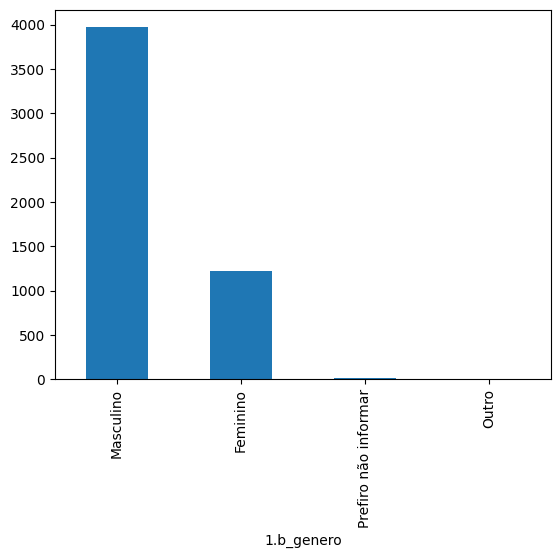

In [12]:
df['1.b_genero'].value_counts().plot(kind='bar')

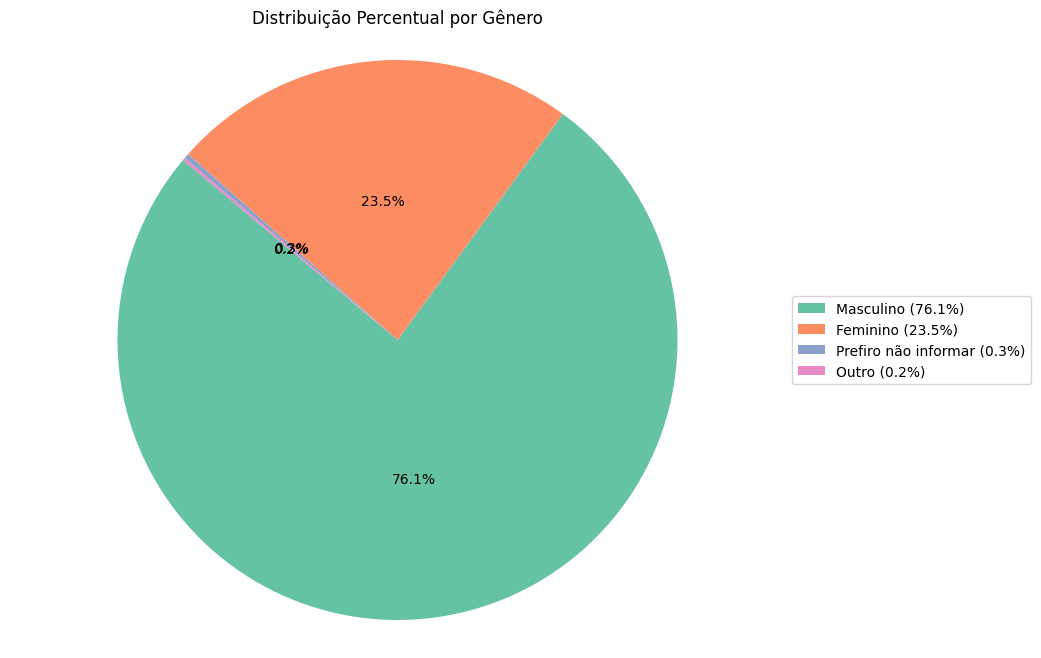

In [13]:
# Distribuição por gênero
genero_counts = df['1.b_genero'].value_counts(dropna=False)
genero_percent = (genero_counts / genero_counts.sum()) * 100


# Gráfico de pizza
plt.figure(figsize=(10, 8))
colors = sns.color_palette("Set2", len(genero_counts))
plt.pie(genero_percent, labels=None, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.5) # Adjusted pctdistance
plt.title("Distribuição Percentual por Gênero")
plt.axis('equal')  # Mantém o formato de círculo
plt.legend(labels=[f'{label} ({percent:.1f}%)' for label, percent in zip(genero_percent.index, genero_percent)], loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
df['1.a_idade'].describe()

,1.a_idade
count,"5,217.00"
mean,32.36
std,7.42
min,18.00
25%,27.00
50%,31.00
75%,36.00
max,68.00


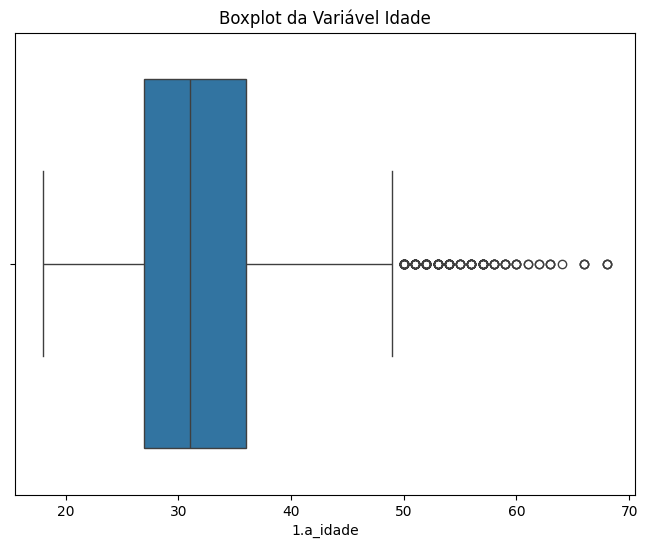

In [15]:
# Plotando o Boxplot da variável Idade
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['1.a_idade'])
plt.title('Boxplot da Variável Idade')
plt.show()

In [16]:
# Análise da distribuição por Raça / Etnia
etnic_counts = df['1.c_cor/raca/etnia'].value_counts(dropna=False)

# Exibindo os resultados com formatação
print("Distribuição por cor/raca/etnia:")
print(etnic_counts)
print("\nPercentual por cor/raca/etnia:")
print((etnic_counts / etnic_counts.sum() * 100).round(2))

Distribuição por cor/raca/etnia:
1.c_cor/raca/etnia
Branca                  3478
Parda                   1180
Preta                    352
Amarela                  155
Prefiro não informar      37
Indígena                  10
Outra                      5
Name: count, dtype: int64

Percentual por cor/raca/etnia:
1.c_cor/raca/etnia
Branca                 66.67
Parda                  22.62
Preta                   6.75
Amarela                 2.97
Prefiro não informar    0.71
Indígena                0.19
Outra                   0.10
Name: count, dtype: float64


In [17]:
# Análise da distribuição por Gênero, Raça / Etnia e UF onde mora

# Distribuição por Gênero
genero_counts = df['1.b_genero'].value_counts(dropna=False)
print("Distribuição por Gênero:")
print(genero_counts)
print("\nPercentual por Gênero:")
print((genero_counts / genero_counts.sum() * 100).round(2))
print("-" * 40)

# Distribuição por Raça / Etnia
etnic_counts = df['1.c_cor/raca/etnia'].value_counts(dropna=False)
print("Distribuição por cor/raca/etnia:")
print(etnic_counts)
print("\nPercentual por cor/raca/etnia:")
print((etnic_counts / etnic_counts.sum() * 100).round(2))
print("-" * 40)

# Distribuição por UF onde mora
uf_counts = df['1.i.1_uf_onde_mora'].value_counts(dropna=False)
print("Distribuição por UF onde mora:")
print(uf_counts)
print("\nPercentual por UF onde mora:")
print((uf_counts / uf_counts.sum() * 100).round(2))

Distribuição por Gênero:
1.b_genero
Masculino               3968
Feminino                1226
Prefiro não informar      15
Outro                      8
Name: count, dtype: int64

Percentual por Gênero:
1.b_genero
Masculino              76.06
Feminino               23.50
Prefiro não informar    0.29
Outro                   0.15
Name: count, dtype: float64
----------------------------------------
Distribuição por cor/raca/etnia:
1.c_cor/raca/etnia
Branca                  3478
Parda                   1180
Preta                    352
Amarela                  155
Prefiro não informar      37
Indígena                  10
Outra                      5
Name: count, dtype: int64

Percentual por cor/raca/etnia:
1.c_cor/raca/etnia
Branca                 66.67
Parda                  22.62
Preta                   6.75
Amarela                 2.97
Prefiro não informar    0.71
Indígena                0.19
Outra                   0.10
Name: count, dtype: float64
---------------------------------------

Análises e filtros para realizar no data frame:

- criar um data frame contendo todas as colunas de identificação do individuo

(0.a_token[0],
 0.d_data/hora_envio[1],
 1.a_idade[2],
 1.a.1_faixa_idade[3],
 1.b_genero[4],
 1.c_cor/raca/etnia[5],
 1.d_pcd[6],
 1.i.1_uf_onde_mora[12],
 1.i.2_regiao_onde_mora[22],
 1.k.1_uf_de_origem[24],
 1.k.2_regiao_de_origem[25],
 1.l_nivel_de_ensino[31],
 1.m_Área_de_formação[32],
 2.a_situação_de_trabalho[33],
 2.h_faixa_salarial[40],






# Ideias:
- Analisar a distribuição da faixa salarial por gênero;
- Analisar A relação do tempo de experiência em dados e a faixa salarial;
- Analisar a quantidade de empresas com times de dados e a quantidade de pessoas nesses times (colunas 74, 73, ;